In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

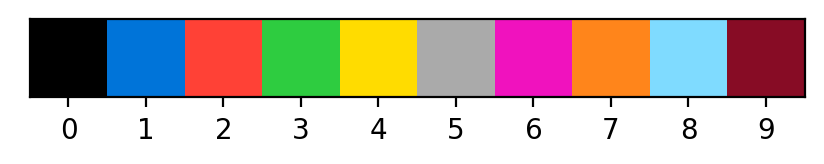

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [9]:
def crop_min_nonb(a0):
    try:
        a=np.array(a0)
        b = np.bincount(a.flatten(),minlength=10)
        b1=np.delete(b,0)
        c = int(np.where(b==np.min(b1[np.nonzero(b1)]))[0])
        coords = np.argwhere(a==c)
        x_min, y_min = coords.min(axis=0)
        x_max, y_max = coords.max(axis=0)
        return a[x_min:x_max+1, y_min:y_max+1].tolist()
    except:
        return a0.tolist()  
def crop_min_nonb_1(a0):
    try:
        a=np.array(a0)
        b = np.bincount(a.flatten(),minlength=10)
        b1=np.delete(b,0)
        c = int(np.where(b==np.min(b1[np.nonzero(b1)]))[0])
        coords = np.argwhere(a==c)
        x_min, y_min = coords.min(axis=0)
        x_max, y_max = coords.max(axis=0)
        return a[x_min-1:x_max+2, y_min-1:y_max+2].tolist()
    except:
        return a0.tolist()  
def crop_max(a0):
    a=np.array(a0)
    try:
        b = np.bincount(a.flatten(),minlength=10)
        b[0] = 500 #???255
        c = np.argsort(b)[-2]
        coords = np.argwhere(a==c)
        x_min, y_min = coords.min(axis=0)
        x_max, y_max = coords.max(axis=0)
        return a[x_min:x_max+1, y_min:y_max+1].tolist()
    except:
        return a.tolist()
def crop_max_1(a0):
    a=np.array(a0)
    try:
        b = np.bincount(a.flatten(),minlength=10)
        b[0] = 500 #???255
        c = np.argsort(b)[-2]
        coords = np.argwhere(a==c)
        x_min, y_min = coords.min(axis=0)
        x_max, y_max = coords.max(axis=0)
        return a[x_min-1:x_max+2, y_min-1:y_max+2].tolist()
    except:
        return a.tolist()
 


In [17]:
#
def _get_bound_not(img0,c):
    img=np.array(img0)
    h, w = img.shape
    x0 = w - 1
    x1 = 0
    y0 = h - 1
    y1 = 0
    for x in range(w):
        for y in range(h):
            if img[y, x] != c:
                continue
            x0 = min(x0, x)
            x1 = max(x1, x)
            y0 = min(y0, y)
            y1 = max(y1, y)
    return x0, x1, y0, y1
def crop_c(img0,c):
    x0,x1,y0,y1=_get_bound_not(img0,c)
    img=np.array(img0)
    if c not in img:
        return -1
    return img[y0:y1+1,x0:x1+1].tolist()

def crop_c_1(img0,c):
    x0,x1,y0,y1=_get_bound_not(img0,c)
    img=np.array(img0)
    if c not in img:
        return -1
    try:
        return img[y0+1:y1,x0+1:x1].tolist()
    except:
        return -1

In [11]:
crop_mode=[crop_min_nonb,crop_max,1,2,3,4,5,6,7,8,9,0]
crop_mode_1=[crop_min_nonb_1,crop_max_1,1,2,3,4,5,6,7,8,9,0]
#crop_mode=[crop_min_nonb,crop_max]
def Apply_crop_mode(mode,x):
    if type(mode)==int:
        if crop_c(x,mode)!=-1:
            return crop_c(x,mode)
        else:
            
            return -1
    else:
        return mode(x)
def Apply_crop_mode_1(mode,x):
    if type(mode)==int:
        if crop_c_1(x,mode)!=-1:
            return crop_c_1(x,mode)
        else:
            
            return -1
    else:
        return mode(x)
    

In [12]:
def Match_crop_mode(basic_task): 
    #returns -1 if no match is found
    #returns  Transformed_Test_Case  if the mathching rule is found
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
   
    for i in range(len(crop_mode)):
        S = crop_mode[i]
        S1=crop_mode_1[i]
        solved = True
        for x0, y in zip(Input,Output):
            x=np.array(x0)
            if Apply_crop_mode(S,x)==-1:

                solved=False
                break


            transformed_x = Apply_crop_mode(S,x)
            
            



            if transformed_x != y:
                solved=False
                break

        if solved == True:

            Transformed_Test_Case = Apply_crop_mode(S,Test_Case)
            return Transformed_Test_Case
    return -1

In [13]:
def Match_crop_mode_1(basic_task): 
    #returns -1 if no match is found
    #returns  Transformed_Test_Case  if the mathching rule is found
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
   
    for i in range(len(crop_mode)):
        S = crop_mode[i]
        S1=crop_mode_1[i]
        solved = True
        for x0, y in zip(Input,Output):
            x=np.array(x0)
            if Apply_crop_mode(S,x)==-1:

                solved=False
                break


            transformed_x = Apply_crop_mode(S,x)
#             plot_picture(transformed_x)
            transformed_x_array=np.array(transformed_x)
            transformed_x_1=transformed_x_array[1:-1,1:-1].tolist()
#             plot_picture(transformed_x_1)



            if transformed_x_1 != y:
                solved=False
                break

        if solved == True:

            Transformed_Test_Case = Apply_crop_mode(S,Test_Case)
            Transformed_Test_Case_array=np.array(Transformed_Test_Case)
            Transformed_Test_Case_1=Transformed_Test_Case_array[1:-1,1:-1].tolist()
            return Transformed_Test_Case_1
    return -1

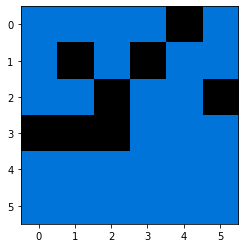

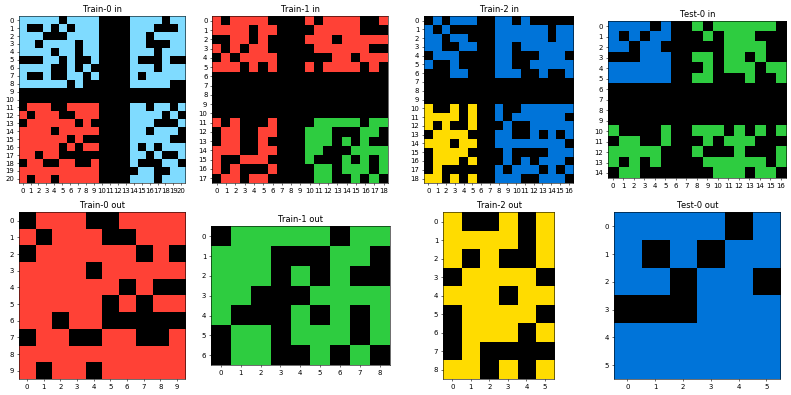

13


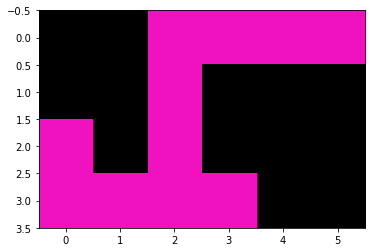

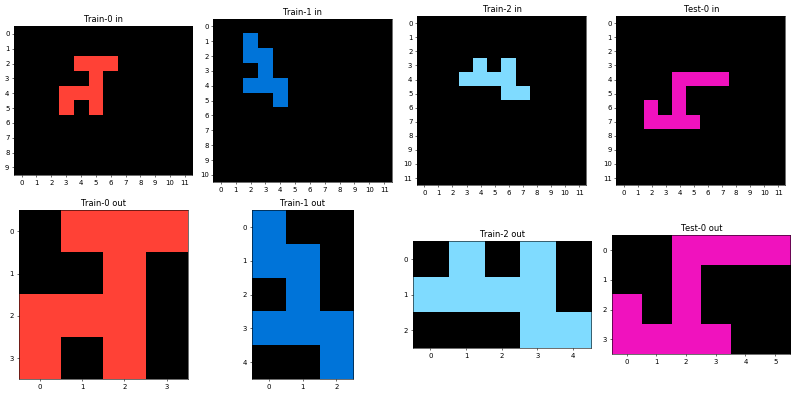

30


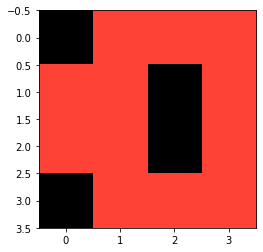

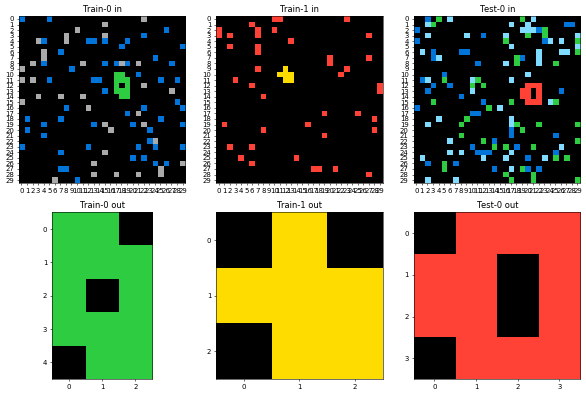

35


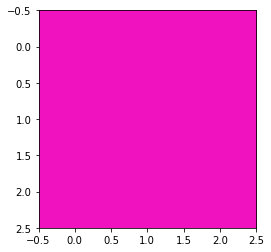

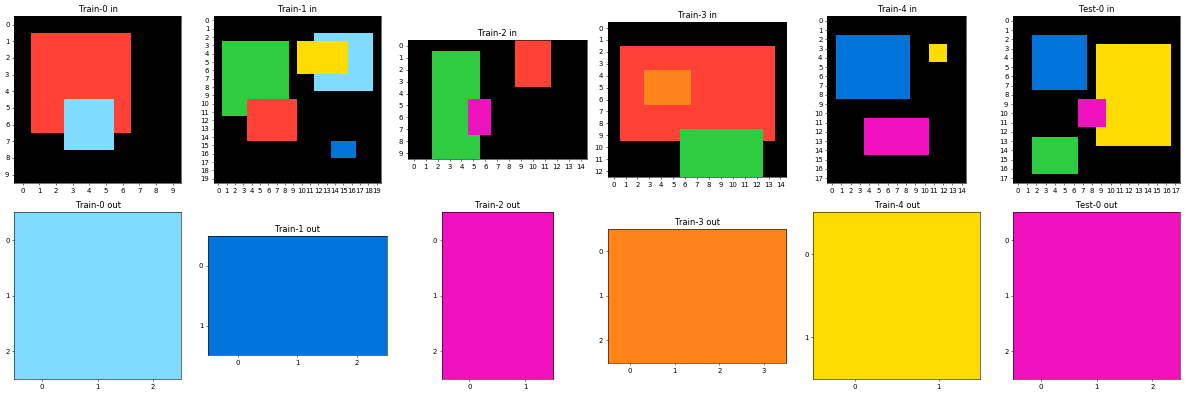

48


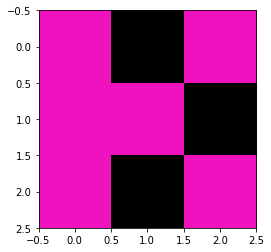

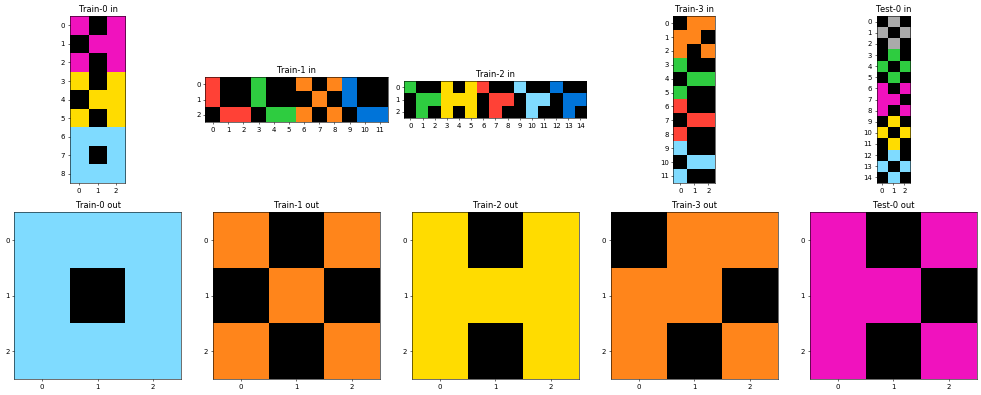

262


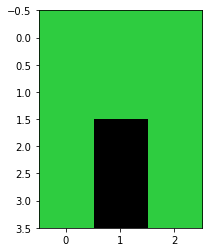

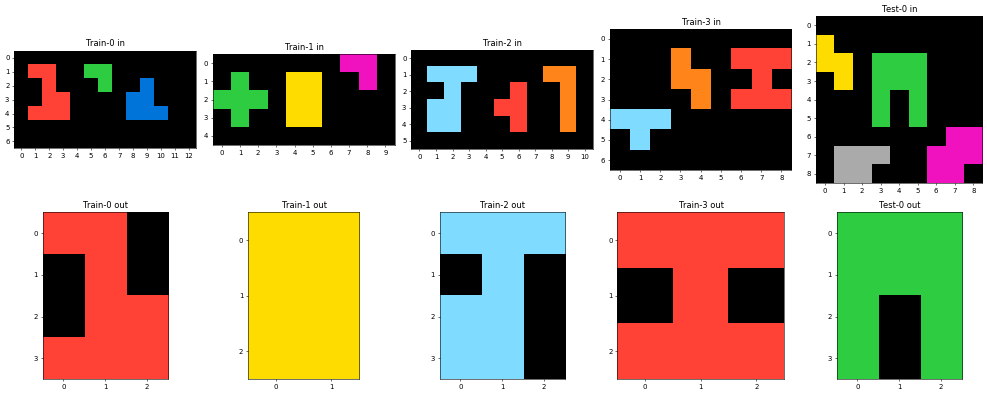

299


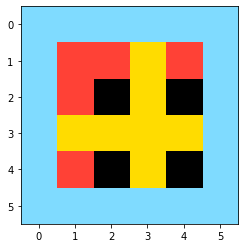

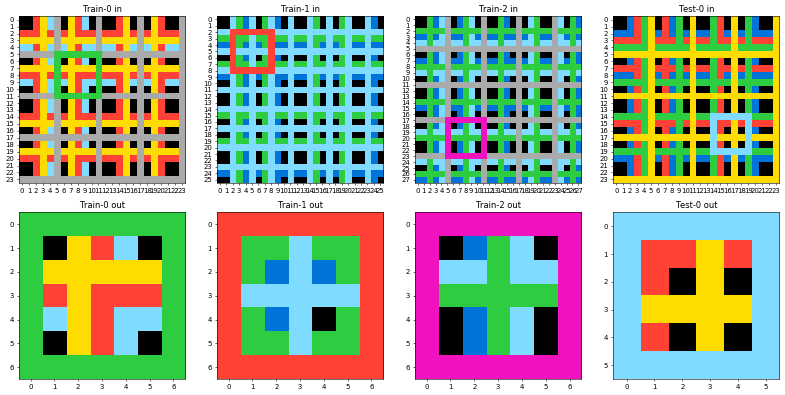

309


In [14]:
for i in range(400):
    task = Trains[i]

    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        proposed_solution = Match_crop_mode(basic_task)
        
        if proposed_solution != -1 and task['test'][j]['output'] ==proposed_solution :
            plot_picture(proposed_solution)
            plot_task(task)
            print(i)
            solved_id.add(i)

In [15]:
for i in range(400):
    task = Evals[i]

    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        proposed_solution = Match_crop_mode(basic_task)
        
        if proposed_solution != -1:
            plot_picture(proposed_solution)
            plot_task(task)
            print(i)
            solved_eva_id.add(i)

In [18]:
for i in range(400):
    task = Trains[i]

    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        proposed_solution = Match_crop_mode_1(basic_task)
        
        if proposed_solution != -1 and task['test'][j]['output'] ==proposed_solution :
            plot_picture(proposed_solution)
            plot_task(task)
            print(i)
            solved_id.add(i)
            

In [17]:
list(solved_id)

[35, 262, 299, 13, 48, 309, 30]

In [18]:
#crop -1 -1
#crop +1 0
#not complete